In [1]:
# testing this API for temperature predictions only, first. De Bilt only..
%pip install openmeteo-requests
%pip install requests-cache retry-requests numpy pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
# days -2 till +7
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://previous-runs-api.open-meteo.com/v1/forecast"
params = {
	"latitude": 52.108499,
	"longitude": 5.180616,
	"hourly": ["temperature_2m", "temperature_2m_previous_day7", "temperature_2m_previous_day1", "temperature_2m_previous_day2", "temperature_2m_previous_day3", "temperature_2m_previous_day4", "temperature_2m_previous_day5", "temperature_2m_previous_day6"],
	"past_days": 2
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

							# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_temperature_2m_previous_day7 = hourly.Variables(1).ValuesAsNumpy()
hourly_temperature_2m_previous_day1 = hourly.Variables(2).ValuesAsNumpy()
hourly_temperature_2m_previous_day2 = hourly.Variables(3).ValuesAsNumpy()
hourly_temperature_2m_previous_day3 = hourly.Variables(4).ValuesAsNumpy()
hourly_temperature_2m_previous_day4 = hourly.Variables(5).ValuesAsNumpy()
hourly_temperature_2m_previous_day5 = hourly.Variables(6).ValuesAsNumpy()
hourly_temperature_2m_previous_day6 = hourly.Variables(7).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["temperature_2m_previous_day7"] = hourly_temperature_2m_previous_day7
hourly_data["temperature_2m_previous_day1"] = hourly_temperature_2m_previous_day1
hourly_data["temperature_2m_previous_day2"] = hourly_temperature_2m_previous_day2
hourly_data["temperature_2m_previous_day3"] = hourly_temperature_2m_previous_day3
hourly_data["temperature_2m_previous_day4"] = hourly_temperature_2m_previous_day4
hourly_data["temperature_2m_previous_day5"] = hourly_temperature_2m_previous_day5
hourly_data["temperature_2m_previous_day6"] = hourly_temperature_2m_previous_day6

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

Coordinates 52.11399841308594°N 5.190999984741211°E
Elevation 6.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s
                         date  temperature_2m  temperature_2m_previous_day7  \
0   2025-03-16 00:00:00+00:00          -0.237                          3.10   
1   2025-03-16 01:00:00+00:00          -0.037                          2.40   
2   2025-03-16 02:00:00+00:00           1.013                          1.80   
3   2025-03-16 03:00:00+00:00           0.363                          1.25   
4   2025-03-16 04:00:00+00:00          -0.787                          0.80   
..                        ...             ...                           ...   
211 2025-03-24 19:00:00+00:00           6.400                          9.70   
212 2025-03-24 20:00:00+00:00           6.100                          9.20   
213 2025-03-24 21:00:00+00:00           5.800                          8.50   
214 2025-03-24 22:00:00+00:00           5.600                          7.45   
215 2025

In [6]:
# 30 past days
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://previous-runs-api.open-meteo.com/v1/forecast"
params = {
	"latitude": 52.108499,
	"longitude": 5.180616,
	"hourly": ["temperature_2m", "temperature_2m_previous_day7", "temperature_2m_previous_day1", "temperature_2m_previous_day2", "temperature_2m_previous_day3", "temperature_2m_previous_day4", "temperature_2m_previous_day5", "temperature_2m_previous_day6"],
	"past_days": 92,
    "forecast_days": 0
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

							# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_temperature_2m_previous_day7 = hourly.Variables(1).ValuesAsNumpy()
hourly_temperature_2m_previous_day1 = hourly.Variables(2).ValuesAsNumpy()
hourly_temperature_2m_previous_day2 = hourly.Variables(3).ValuesAsNumpy()
hourly_temperature_2m_previous_day3 = hourly.Variables(4).ValuesAsNumpy()
hourly_temperature_2m_previous_day4 = hourly.Variables(5).ValuesAsNumpy()
hourly_temperature_2m_previous_day5 = hourly.Variables(6).ValuesAsNumpy()
hourly_temperature_2m_previous_day6 = hourly.Variables(7).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["temperature_2m_previous_day7"] = hourly_temperature_2m_previous_day7
hourly_data["temperature_2m_previous_day1"] = hourly_temperature_2m_previous_day1
hourly_data["temperature_2m_previous_day2"] = hourly_temperature_2m_previous_day2
hourly_data["temperature_2m_previous_day3"] = hourly_temperature_2m_previous_day3
hourly_data["temperature_2m_previous_day4"] = hourly_temperature_2m_previous_day4
hourly_data["temperature_2m_previous_day5"] = hourly_temperature_2m_previous_day5
hourly_data["temperature_2m_previous_day6"] = hourly_temperature_2m_previous_day6

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

Coordinates 52.11399841308594°N 5.190999984741211°E
Elevation 6.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s
                          date  temperature_2m  temperature_2m_previous_day7  \
0    2024-12-16 00:00:00+00:00       10.712999                          3.75   
1    2024-12-16 01:00:00+00:00       10.962999                          3.50   
2    2024-12-16 02:00:00+00:00       11.013000                          3.30   
3    2024-12-16 03:00:00+00:00       10.813000                          3.05   
4    2024-12-16 04:00:00+00:00       10.763000                          2.85   
...                        ...             ...                           ...   
2203 2025-03-17 19:00:00+00:00        5.013000                          5.35   
2204 2025-03-17 20:00:00+00:00        4.463000                          4.80   
2205 2025-03-17 21:00:00+00:00        3.413000                          4.20   
2206 2025-03-17 22:00:00+00:00        2.863000                          3.60 

In [7]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(hourly_dataframe):
    # Rename column 'temperature_2m_previous_day7' to 'previous_day7'
    hourly_dataframe = hourly_dataframe.rename(columns={'temperature_2m_previous_day7': 'previous_day7'})
    # Rename column 'temperature_2m_previous_day1' to 'previous_day1'
    hourly_dataframe = hourly_dataframe.rename(columns={'temperature_2m_previous_day1': 'previous_day1'})
    # Rename column 'temperature_2m_previous_day2' to 'previous_day2'
    hourly_dataframe = hourly_dataframe.rename(columns={'temperature_2m_previous_day2': 'previous_day2'})
    # Rename column 'temperature_2m_previous_day3' to 'previous_day3'
    hourly_dataframe = hourly_dataframe.rename(columns={'temperature_2m_previous_day3': 'previous_day3'})
    # Rename column 'temperature_2m_previous_day4' to 'previous_day4'
    hourly_dataframe = hourly_dataframe.rename(columns={'temperature_2m_previous_day4': 'previous_day4'})
    # Rename column 'temperature_2m_previous_day5' to 'previous_day5'
    hourly_dataframe = hourly_dataframe.rename(columns={'temperature_2m_previous_day5': 'previous_day5'})
    # Rename column 'temperature_2m_previous_day6' to 'previous_day6'
    hourly_dataframe = hourly_dataframe.rename(columns={'temperature_2m_previous_day6': 'previous_day6'})
    return hourly_dataframe

hourly_dataframe_clean = clean_data(hourly_dataframe.copy())
hourly_dataframe_clean.head()

,date,temperature_2m,previous_day7,previous_day1,previous_day2,previous_day3,previous_day4,previous_day5,previous_day6
0,2024-12-16 00:00:00+00:00,10.712999,3.75,10.162999,10.55,10.20,9.25,8.90,8.05
1,2024-12-16 01:00:00+00:00,10.962999,3.50,10.263000,10.70,10.40,9.25,9.20,8.20
2,2024-12-16 02:00:00+00:00,11.013000,3.30,10.662999,10.75,10.60,9.35,9.30,8.45
3,2024-12-16 03:00:00+00:00,10.813000,3.05,10.763000,10.70,10.65,9.40,9.40,8.70
4,2024-12-16 04:00:00+00:00,10.763000,2.85,10.263000,10.65,10.55,9.55,9.55,8.90


In [8]:
hourly_dataframe_clean['date'] = hourly_dataframe_clean['date'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')
hourly_dataframe_clean.head()

,date,temperature_2m,previous_day7,previous_day1,previous_day2,previous_day3,previous_day4,previous_day5,previous_day6
0,2024-12-16T00:00:00Z,10.712999,3.75,10.162999,10.55,10.20,9.25,8.90,8.05
1,2024-12-16T01:00:00Z,10.962999,3.50,10.263000,10.70,10.40,9.25,9.20,8.20
2,2024-12-16T02:00:00Z,11.013000,3.30,10.662999,10.75,10.60,9.35,9.30,8.45
3,2024-12-16T03:00:00Z,10.813000,3.05,10.763000,10.70,10.65,9.40,9.40,8.70
4,2024-12-16T04:00:00Z,10.763000,2.85,10.263000,10.65,10.55,9.55,9.55,8.90


In [10]:
# Convert the 'date' column back to datetime format
hourly_dataframe_clean['date'] = pd.to_datetime(hourly_dataframe_clean['date'])

# Filter the dataframe for the specified date range
start_date = '2025-01-01'
end_date = '2025-01-07'
filtered_dataframe = hourly_dataframe_clean[(hourly_dataframe_clean['date'] >= start_date) & (hourly_dataframe_clean['date'] <= end_date)]

filtered_dataframe.head()

,date,temperature_2m,previous_day7,previous_day1,previous_day2,previous_day3,previous_day4,previous_day5,previous_day6
384,2025-01-01 00:00:00+00:00,7.463,8.25,6.963,8.50,9.20,9.55,6.20,8.55
385,2025-01-01 01:00:00+00:00,7.663,8.25,7.413,8.70,9.10,9.85,6.15,8.50
386,2025-01-01 02:00:00+00:00,7.263,8.00,7.113,8.75,8.85,10.10,6.30,8.20
387,2025-01-01 03:00:00+00:00,7.763,7.80,7.463,8.70,8.65,10.00,6.70,7.85
388,2025-01-01 04:00:00+00:00,7.663,7.70,6.913,8.45,8.75,9.45,7.70,7.55


In [11]:

%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


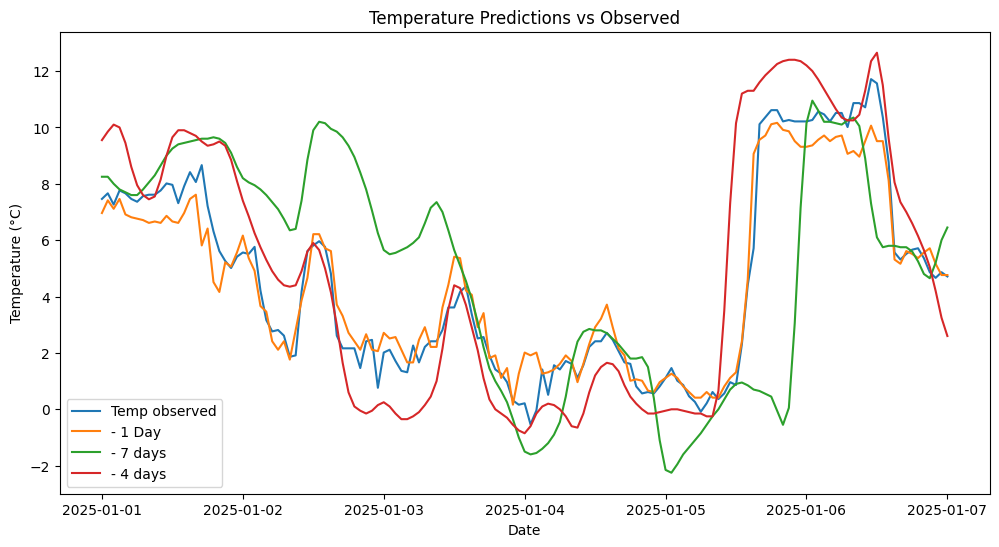

In [15]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(filtered_dataframe['date'], filtered_dataframe['temperature_2m'], label='Temp observed')
plt.plot(filtered_dataframe['date'], filtered_dataframe['previous_day1'], label='- 1 Day')
plt.plot(filtered_dataframe['date'], filtered_dataframe['previous_day7'], label='- 7 days')
plt.plot(filtered_dataframe['date'], filtered_dataframe['previous_day4'], label='- 4 days')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Predictions vs Observed')
plt.legend()

# Show the plot
plt.show()

In [9]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
